In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# *Loading the data.*

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the datasets
movies_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

In [ ]:
sample_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")
train_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
test_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

# *Getting to know train_data.*
*This section involves exploring the train_data--this includes looking at the shape of the dataset, it's columns and their types, null values present, number of unique values for each variable, etc. Furthermore, we perform basic data imputing and preprocessing, depending on column type and the information they presnt.*

In [ ]:
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [ ]:
train_data.shape

(162758, 5)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [ ]:
train_data.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [ ]:
train_data.isin(['?','na',' ','n']).sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

In [ ]:
train_data.describe(include='all')

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [ ]:
train_data['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish    708
fantasy_forrest_gump_intrigue                  245
james_t._kirk_marty_mcfly_astonish             186
marvelous_lara_croft_luke_skywalker            140
michael_corleone_v_marty_mcfly_tony_stark      138
                                              ... 
james_bond_legend_marty_mcfly_elegant            1
myriad_aurora_edward_scissorhands                1
mystic_ferris_bueller_spectacular                1
crimson_velvet                                   1
forrest_gump_fantasy_epic                        1
Name: movieid, Length: 16812, dtype: int64

In [ ]:
train_data['reviewerName'].value_counts()

Sherri Morrison      962
Veronica Serrano     952
Mrs. Vickie Young    827
Kristy Ferguson      822
Heather Pena         797
                    ... 
Ashley Munoz           1
Ryan Dean              1
Joanna Li              1
Jason Carroll          1
Chad Mueller           1
Name: reviewerName, Length: 4482, dtype: int64

*There are 4 columns include--movieid, reviwerName, reviewText and isFrequentReviewer.Three of these columns are object type and isFrequentReviewer is boolean type. Further we see that only reviewText has null rows.*

In [ ]:
train_data['sentiment'].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

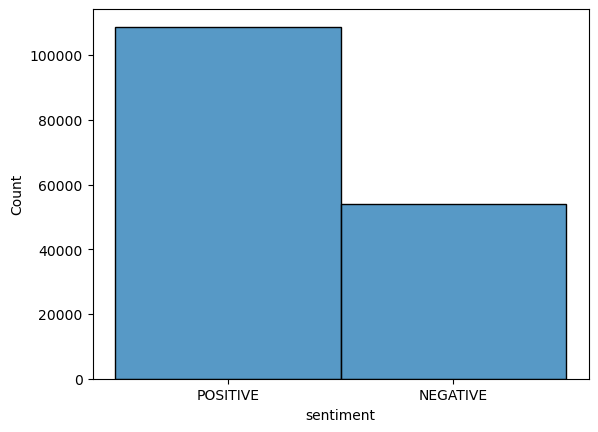

In [ ]:
sns.histplot(train_data['sentiment'])

In [ ]:
#ratio_of_positive/negitive
(train_data['sentiment'].value_counts()/len(train_data['sentiment']))*100

POSITIVE    66.823751
NEGATIVE    33.176249
Name: sentiment, dtype: float64

*Now, we anlyse the sentiment column of the train, since it is the target column.We find that the dataset we have is imbalanced.*
***It has 67% positive sentiment data, while only 33% data is for negitive sentiment.***

**Encoding/preprocessing the train_data: Here, we perform:**     

*1)Impute missing values using most_frequent startegy of Simple imputer.      
2)use OrdinalEncoder to transform isFrequentReviewer column- it automatically transforms, false to 0 and true to 1.     
2)use LabelEncoder to transform the label column-sentiment.*

In [ ]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy="most_frequent")


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.compose import ColumnTransformer
ORD= OrdinalEncoder()
le=LabelEncoder()

In [ ]:
train_data['reviewText']= si.fit_transform(train_data[['reviewText']])
train_data['sentiment']=le.fit_transform(train_data['sentiment'])
train_data['isFrequentReviewer']=ORD.fit_transform(train_data[['isFrequentReviewer']])

In [ ]:
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,0.0,Henry Selick’s first movie since 2009’s Corali...,1
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,0.0,With a cast that reads like the Vogue Oscar pa...,0
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,1.0,Creed II does not give us anything but another...,1
3,lara_croft_glimmer,Ryan Barrett,0.0,"I know what you're thinking, but this is no Li...",1
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,0.0,Director Fernando Meirelles tells the story wi...,1


In [ ]:
train_data['sentiment'].value_counts()

1    108761
0     53997
Name: sentiment, dtype: int64

In [ ]:
train_data.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [ ]:
train_data.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

<Axes: xlabel='isFrequentReviewer', ylabel='Count'>

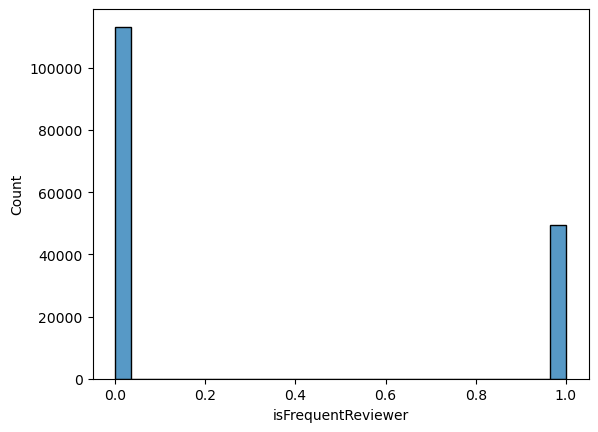

In [ ]:
sns.histplot(train_data['isFrequentReviewer'])

*Insights that we find from the data are.*       
*1.Train dataset is not a balanced one.It's biased towards positive sentiment prediction. The ratio of positive/negitive reviews are ~2.*     
*2.We see it has five columns, one of them is our target column-sentiment. Their initial preprocessing has been performed above*        
*3.The most frequent reviewer is 'Sherri Morrison', the most_frequent reviewText is 'Parental Content Review' and the most frequnt movie_id is 'escape_the_terminator_tyler_durden_astonish'*        
*4.Here we use most_frequent as the imputing strategy for reviewText, this is because it gives a better result than just filling it with blanks.*

***EDA for the text data of train_data--FeatureEngineering/Analysis***       
*Here we use text extraction using Countvectorizer to find which words are used most used in the reviews with or without the stop words (most commonly used in sentences-from internet).We also did this analysis seperately for positive and negitive sentiment reviews.*

In [ ]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [ ]:
doc1= np.array(train_data['reviewText'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect=CountVectorizer(max_features=10)
cvect2=CountVectorizer(max_features=1)
bag= cvect.fit_transform(doc1)
bag2= cvect2.fit_transform(doc1)
bag.toarray(), bag2.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 2, 0],
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0],
        [1],
        [0],
        ...,
        [2],
        [1],
        [0]]))

In [ ]:
 top_ten=print(cvect.get_feature_names_out())
 top =  print(cvect2.get_feature_names_out())

['and' 'as' 'but' 'in' 'is' 'it' 'of' 'that' 'the' 'to']
['the']


*'the' is the most used word in the review--and above that are the top ten words used in the th review...this is along the expected line. Its similar to what we expect from ANY/ALL documents. We can put them as stop words along with similar such words.*

***Using stop_words we perform the same analysis***

In [ ]:
doc2= np.array(train_data['reviewText'])

In [ ]:
cvect3=CountVectorizer(max_features=10,stop_words=stop_words )
cvect4=CountVectorizer(max_features=1,stop_words=stop_words )

In [ ]:
bag= cvect3.fit_transform(doc2)
bag2= cvect4.fit_transform(doc2)
bag.toarray(), bag2.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]]))

In [ ]:
 top_ten=print(cvect3.get_feature_names_out())
 top =  print(cvect4.get_feature_names_out())

['44' '46' 'content' 'film' 'like' 'movie' 'much' 'one' 'review' 'story']
['film']


***We comapre the most frequently occuring word in positive and negitive sentiment***

In [ ]:
#making seperate datasets for positive and negitive reviews
data_positive=train_data[train_data['sentiment']==1]
data_negitive=train_data[train_data['sentiment']==0]

In [ ]:
doc3= np.array(data_positive['reviewText'])
doc4= np.array(data_negitive['reviewText'])

***FOR POSITIVE REVIEWS***

In [ ]:
bag= cvect3.fit_transform(doc3)
bag2= cvect4.fit_transform(doc3)
bag.toarray(), bag2.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [ ]:
 top_ten=print(cvect3.get_feature_names_out())
 top =  print(cvect4.get_feature_names_out())

['44' '46' 'best' 'film' 'good' 'like' 'movie' 'one' 'review' 'story']
['film']


***NEGITIVE SENTIMENT REVIEW***

In [ ]:
bag= cvect3.fit_transform(doc4)
bag2= cvect4.fit_transform(doc4)
bag.toarray(), bag2.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]),
 array([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [1]]))

In [ ]:
 top_ten=print(cvect3.get_feature_names_out())
 top =  print(cvect4.get_feature_names_out())

['46' 'content' 'film' 'like' 'movie' 'much' 'one' 'parental' 'review'
 'story']
['film']


*On using stop_words, we see that even though the most used word is the same(that is,'film') for reviews for both sentiment.For the top ten words we see a difference --words like 'best','good' are present, whereas, for negitive sentiments we see words like--'parental','much'. We also observed the most used review which we used to imputing null values in reviewText, 'parental' word was present. The improved result could have been because better negitive review detection.*

# *Performing EDA on movies_data*

*In this section we look at the movies_dataset. We look at its columns, their types,etc. We will further deal with the null row values by using different imputation techniques.We also perform preprocessing based on column type. After that we merge the dataset with train_data above and understanf how the numerical column affect our target variable.*

In [ ]:
#checking_movies_data
movies_data.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [ ]:
movies_data.isnull().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [ ]:
movies_data.shape

(143258, 14)

In [ ]:
movies_data.select_dtypes('number').columns
movies_data.select_dtypes('object').columns

Index(['movieid', 'title', 'rating', 'ratingContents', 'releaseDateTheaters',
       'releaseDateStreaming', 'genre', 'originalLanguage', 'director',
       'boxOffice', 'distributor', 'soundType'],
      dtype='object')

*We see that releaseDateTheaters,  relaseDatestreaming and BoxOffice are shownn as object. We will convert them to numerical columns.The first two will be converted to datetime format and for box offic we use to_numeric for conversion as shown below.After this we can extract important information from these variables--like year, month of realease,etc.*

In [ ]:
movies_data[['releaseDateTheaters','releaseDateStreaming', 'boxOffice']]

,releaseDateTheaters,releaseDateStreaming,boxOffice
0,NaN,2018-08-25,NaN
1,NaN,2020-02-11,NaN
2,NaN,NaN,NaN
3,NaN,2020-10-23,NaN
4,NaN,2017-03-27,NaN
...,...,...,...
143253,2002-08-27,NaN,NaN
143254,NaN,NaN,NaN
143255,NaN,NaN,NaN
143256,NaN,2006-11-21,NaN


In [ ]:
movies_data['boxOffice'].value_counts()

$1.1M      118
$1.2M      100
$1.3M       97
$1.0M       97
$1.6M       70
          ... 
$86.5K       1
$160.4K      1
$129.4K      1
$536.8K      1
$218.3K      1
Name: boxOffice, Length: 4863, dtype: int64

In [ ]:
movies_data['boxOffice']=pd.to_numeric(movies_data['boxOffice'].str.replace('[^0-9.]', ''))

# converting dates from object to datetime
movies_data['releaseDateTheaters']= pd.to_datetime(movies_data['releaseDateTheaters'])
movies_data['releaseDateStreaming']= pd.to_datetime(movies_data['releaseDateStreaming'])

/tmp/ipykernel_20/2273438333.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_data['boxOffice']=pd.to_numeric(movies_data['boxOffice'].str.replace('[^0-9.]', ''))


In [ ]:
movies_data['Year_Theaters']= movies_data['releaseDateTheaters'].dt.year
movies_data['Month_Theaters']=movies_data['releaseDateTheaters'].dt.month

In [ ]:
movies_data['Year_Stream']= movies_data['releaseDateStreaming'].dt.year
movies_data['Month_Stream']=movies_data['releaseDateStreaming'].dt.month

In [ ]:
movies_data.describe(include='all')

/tmp/ipykernel_20/14951424.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movies_data.describe(include='all')
/tmp/ipykernel_20/14951424.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movies_data.describe(include='all')


,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType,Year_Theaters,Month_Theaters,Year_Stream,Month_Stream
count,143258,143258,73248.000000,13991,13991,30773,79420,129431.000000,132175,129400,143258,14743.000000,23005,15917,30773.000000,30773.000000,79420.000000,79420.000000
unique,126404,126404,NaN,10,8353,12062,4725,NaN,2912,112,62208,NaN,3694,551,NaN,NaN,NaN,NaN
top,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,R,['Language'],2018-09-14 00:00:00,2017-05-22 00:00:00,NaN,Drama,English,Joseph Brooks,NaN,Paramount Pictures,Surround,NaN,NaN,NaN,NaN
freq,367,367,NaN,7734,365,37,1232,NaN,27860,85034,4194,NaN,994,4075,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,1902-10-04 00:00:00,1928-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2032-04-21 00:00:00,2023-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,55.674967,NaN,NaN,NaN,NaN,93.708578,NaN,NaN,NaN,110.960842,NaN,NaN,1994.935268,6.649985,2013.997028,6.370259
std,NaN,NaN,24.553648,NaN,NaN,NaN,NaN,28.129175,NaN,NaN,NaN,186.776874,NaN,NaN,27.778387,3.431532,5.911238,3.465665
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1902.000000,1.000000,1928.000000,1.000000
25%,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,84.000000,NaN,NaN,NaN,8.600000,NaN,NaN,1981.000000,4.000000,2010.000000,3.000000


In [ ]:
movies_data.shape

(143258, 18)

*From above we see that the difference between the maximum and 75th percentile for runtimeMinutes is unusually high. This indicates the presence of outliers. Below we calculate how many datapoints below to that category. We do this using percentile method.*

In [ ]:
fq=movies_data['runtimeMinutes'].quantile(0.25)
tq=movies_data['runtimeMinutes'].quantile(0.75)

In [ ]:
iqr=tq-fq
iqr

19.0

In [ ]:
ul=tq+1.5*iqr de
ll=fq-1.5*iqr
ul,ll

(131.5, 55.5)

In [ ]:
((len(movies_data[movies_data['runtimeMinutes']<ll])+len(movies_data[movies_data['runtimeMinutes']>ul]))/len(movies_data))*100

10.275167878931718

*We see that % of outliers is close to 10%, so we dont remove them. If we remove them important information might be lost from other columns.*

**VISUALISATION OF NUMERICAL COLUMNS**

<Axes: xlabel='audienceScore', ylabel='Count'>

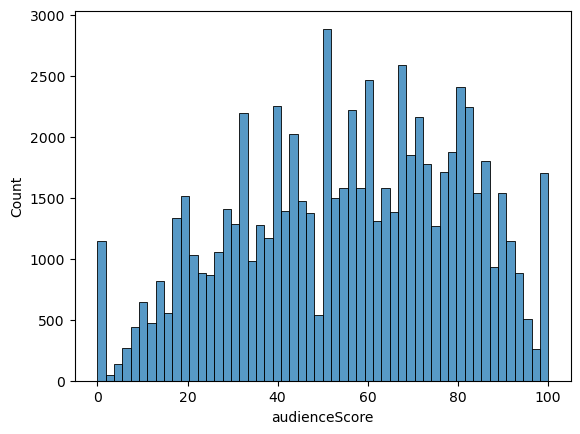

In [ ]:
sns.histplot(movies_data['audienceScore'])

In [ ]:
movies_data['audienceScore'].describe()

count    73248.000000
mean        55.674967
std         24.553648
min          0.000000
25%         37.000000
50%         57.000000
75%         76.000000
max        100.000000
Name: audienceScore, dtype: float64

*Over here, we plot distribution of audience score. It ranges from 0 to 100, with a peak close to 60. It's almost in the middle, leaning towards the higher value.*

<Axes: xlabel='Year_Theaters', ylabel='Count'>

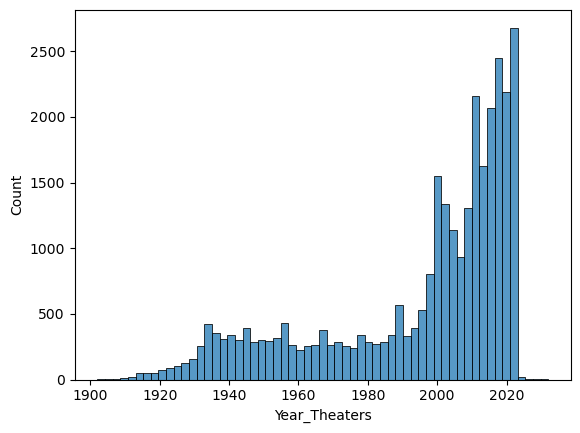

In [ ]:
sns.histplot(movies_data['Year_Theaters'])

In [ ]:
movies_data['Year_Theaters'].describe()

count    30773.000000
mean      1994.935268
std         27.778387
min       1902.000000
25%       1981.000000
50%       2006.000000
75%       2016.000000
max       2032.000000
Name: Year_Theaters, dtype: float64

*We see that the number of movies relaeasing in theaters is increasing with years. The increase almost seems exponential. This is along the expected lines, since the starting point is close to 1900, and the movie business and theatre business is seen a very high boom since then. We see the increase has been the most sharp since early 2000's.*

<Axes: xlabel='Month_Theaters', ylabel='Count'>

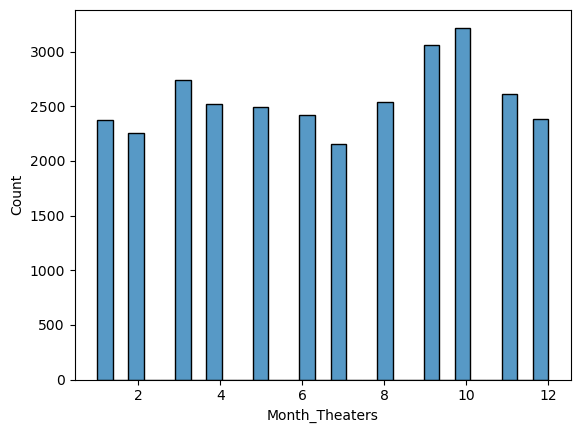

In [ ]:
sns.histplot(movies_data['Month_Theaters'])

In [ ]:
movies_data['Month_Theaters'].describe()

count    30773.000000
mean         6.649985
std          3.431532
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Month_Theaters, dtype: float64

*Above we have plotted months and the counts of movies relaeased in them. Here, we see that there is almost a uniform distribution of the number of movies realeased across all months. We also see a small spike around October. This could be because of holidays like halloween, since most of the movies in the dataset are western.*

<Axes: xlabel='Year_Stream', ylabel='Count'>

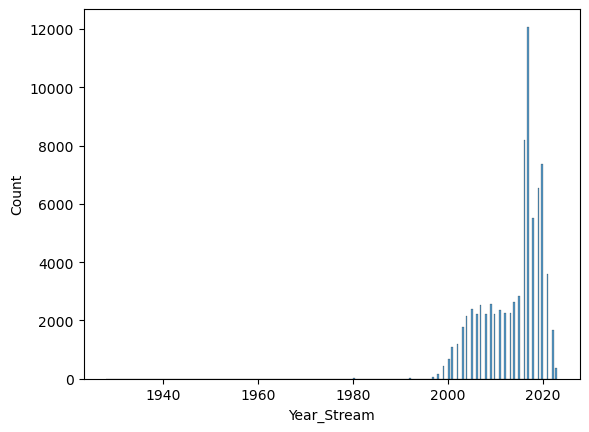

In [ ]:
sns.histplot(movies_data['Year_Stream'])

In [ ]:
movies_data['Year_Stream'].describe()

count    79420.000000
mean      2013.997028
std          5.911238
min       1928.000000
25%       2010.000000
50%       2016.000000
75%       2018.000000
max       2023.000000
Name: Year_Stream, dtype: float64

*Here, we have plotted stream_year with the counts of movies released in those years. Since streaming is a reletively new phenomenon, and we see distribution starting only from 2000's. Moreover, we that it's only in the last few years that the there has been a very high increase in the movie release on streaming platforms.*

<Axes: xlabel='Month_Stream', ylabel='Count'>

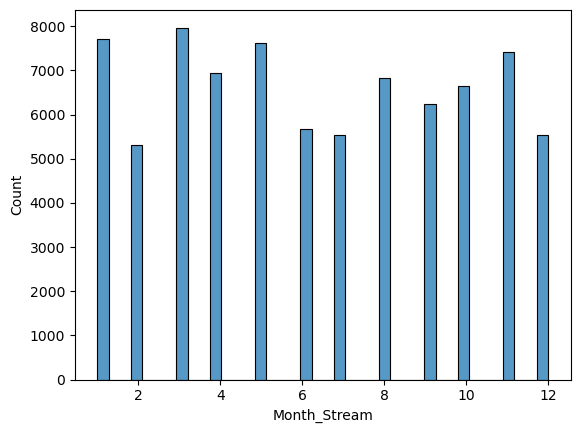

In [ ]:
sns.histplot(movies_data['Month_Stream'])

In [ ]:
movies_data['Month_Stream'].describe()

count    79420.000000
mean         6.370259
std          3.465665
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: Month_Stream, dtype: float64

*We see that like before, this follows an almost uniform distribution.*

*Below we drop the columns releaseDateTheaters and releaseDateStreaming since we have already extracted information about month and year from it and stored it in different columns.*

In [ ]:
#dropping the date columns since we have the information we need from them
movies_data= movies_data.drop(['releaseDateTheaters','releaseDateStreaming'], axis=1)

In [ ]:
movies_data.shape

(143258, 16)

In [ ]:
movies_data.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'boxOffice',
       'distributor', 'soundType', 'Year_Theaters', 'Month_Theaters',
       'Year_Stream', 'Month_Stream'],
      dtype='object')

***Preprocessing***

*Below we perform various preprocessing steps for the movies dataset. First, we perform imputation using SimpleImputer, followed by different preprocessing steps for different columns depending on whether they are numerical or categorical columns.For numerical columns we use MinMaxScaler and for categorical columns we use CountVectorizer. These have been chosen because they are giving better results than other alternatives.*

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Initiating all the SimpleImputers we might use
SI1= SimpleImputer(strategy='mean')
SI2= SimpleImputer(strategy='most_frequent')
SI3= SimpleImputer(strategy='constant', fill_value=' ')
OHE= OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
#initiating other preprocessing steps
MM= MinMaxScaler()
vect= CountVectorizer()

In [ ]:
#checking what fraction of the values are nu0lll .
(movies_data.isnull().sum()/len(movies_data))*100>80

movieid             False
title               False
audienceScore       False
rating               True
ratingContents       True
runtimeMinutes      False
genre               False
originalLanguage    False
director            False
boxOffice            True
distributor          True
soundType            True
Year_Theaters       False
Month_Theaters      False
Year_Stream         False
Month_Stream        False
dtype: bool

*We see that  5 columns have greater than 80 percent of values as null, there is no point conitnuing with them as they dont give any important information which can be trusted. We are continue with preprocessing and analysis with the rest of the columns.*

In [ ]:
movies_data.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'boxOffice',
       'distributor', 'soundType', 'Year_Theaters', 'Month_Theaters',
       'Year_Stream', 'Month_Stream'],
      dtype='object')

In [ ]:
drop_col= ['rating','ratingContents','boxOffice','distributor', 'soundType']

In [ ]:
# dropping unimportant columns
movies_data=movies_data.drop(drop_col, axis=1)
movies_data.shape

(143258, 11)

In [ ]:
num_col=movies_data.select_dtypes('number').columns

In [ ]:
movies_data.select_dtypes('object').columns

Index(['movieid', 'title', 'genre', 'originalLanguage', 'director'], dtype='object')

In [ ]:
movies_data.isnull().sum()

movieid                  0
title                    0
audienceScore        70010
runtimeMinutes       13827
genre                11083
originalLanguage     13858
director                 0
Year_Theaters       112485
Month_Theaters      112485
Year_Stream          63838
Month_Stream         63838
dtype: int64

***Use of pipeline***

In [ ]:
from  sklearn.pipeline import Pipeline

In [ ]:
pipe_num= Pipeline([('impute_1',SI1),('Scale_1', MM)])

#for the categorical we will make a pipeline for OriginalLanguage and genre because the rest dont have any null values and we will use different extraction techniques for that.

In [ ]:
catg_col=['originalLanguage','genre']
pipe_catg= Pipeline([('impute_2',SI2 )])

In [ ]:
from sklearn.compose import ColumnTransformer
ct1=ColumnTransformer([('number',pipe_num,num_col),('object',pipe_catg, catg_col)],
                      remainder='passthrough', verbose_feature_names_out=False)
ct1

ColumnTransformer(remainder='passthrough',
                  transformers=[('number',
                                 Pipeline(steps=[('impute_1', SimpleImputer()),
                                                 ('Scale_1', MinMaxScaler())]),
                                 Index(['audienceScore', 'runtimeMinutes', 'Year_Theaters', 'Month_Theaters',
       'Year_Stream', 'Month_Stream'],
      dtype='object')),
                                ('object',
                                 Pipeline(steps=[('impute_2',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['originalLanguage', 'genre'])],
                  verbose_feature_names_out=False)

In [ ]:
movies_data_final=ct1.fit_transform(movies_data)

In [ ]:
columns=ct1.get_feature_names_out()

In [ ]:
movies_data_new=pd.DataFrame(movies_data_final,columns=columns)

In [ ]:
movies_data_new.head()

,audienceScore,runtimeMinutes,Year_Theaters,Month_Theaters,Year_Stream,Month_Stream,originalLanguage,genre,movieid,title,director
0,0.5,0.027418,0.714887,0.513635,0.947368,0.636364,English,"Comedy, Horror, Sci-fi",han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,Claude Nicolet
1,0.55675,0.041867,0.714887,0.513635,0.968421,0.090909,English,Drama,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,Nathan Haack
2,0.43,0.04409,0.714887,0.513635,0.905232,0.488205,Korean,Drama,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,Theresa Smith
3,0.6,0.032975,0.714887,0.513635,0.968421,0.818182,English,"Action, Mystery & thriller",elegant_hermione_granger,Elegant Hermione Granger,Donald Lewis
4,0.7,0.02927,0.714887,0.513635,0.936842,0.181818,English,"Fantasy, Adventure, Animation",adventure_rocky_balboa,Adventure Rocky Balboa,Howard Simms


In [ ]:
movies_data_new.isnull().sum()

audienceScore       0
runtimeMinutes      0
Year_Theaters       0
Month_Theaters      0
Year_Stream         0
Month_Stream        0
originalLanguage    0
genre               0
movieid             0
title               0
director            0
dtype: int64

In [ ]:
movies_data_new[num_col]=movies_data_new[num_col].apply(pd.to_numeric)

In [ ]:
movies_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   audienceScore     143258 non-null  float64
 1   runtimeMinutes    143258 non-null  float64
 2   Year_Theaters     143258 non-null  float64
 3   Month_Theaters    143258 non-null  float64
 4   Year_Stream       143258 non-null  float64
 5   Month_Stream      143258 non-null  float64
 6   originalLanguage  143258 non-null  object 
 7   genre             143258 non-null  object 
 8   movieid           143258 non-null  object 
 9   title             143258 non-null  object 
 10  director          143258 non-null  object 
dtypes: float64(6), object(5)
memory usage: 12.0+ MB


*We see that we have successfully  handled all the null values and  preprocessed them based on whether they were numerical or categorical. We used ColumnTransformer to do the preprocessing all together.*

***Duplicate removal and merging of train and movies datasets on 'movie_id'.***

In [ ]:
movies_data_new.drop_duplicates('movieid', inplace=True)

In [ ]:
train_data_final= train_data.merge(movies_data_new,on='movieid', how='inner')

In [ ]:
train_data_final.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,runtimeMinutes,Year_Theaters,Month_Theaters,Year_Stream,Month_Stream,originalLanguage,genre,title,director
0,marvelous_pirate,Benjamin Henry,0.0,Henry Selick’s first movie since 2009’s Corali...,1,0.65,0.038533,0.923077,0.818182,0.989474,0.818182,English,"Comedy, Animation, Adventure, Fantasy",Marvelous Pirate,Bennie Basso
1,marvelous_pirate,Sharon Foster,0.0,&#91;T&#93;he haphazard way this story is asse...,0,0.65,0.038533,0.923077,0.818182,0.989474,0.818182,English,"Comedy, Animation, Adventure, Fantasy",Marvelous Pirate,Bennie Basso
2,marvelous_pirate,Melinda Dunn,0.0,The stop-motion artistry of Wendell &amp; Wild...,1,0.65,0.038533,0.923077,0.818182,0.989474,0.818182,English,"Comedy, Animation, Adventure, Fantasy",Marvelous Pirate,Bennie Basso
3,marvelous_pirate,Mr. Wayne Smith,0.0,Wendell &amp; Wild is narratively overstuffed ...,0,0.65,0.038533,0.923077,0.818182,0.989474,0.818182,English,"Comedy, Animation, Adventure, Fantasy",Marvelous Pirate,Bennie Basso
4,marvelous_pirate,Connor Nelson,0.0,For being about the Netherworlds&#44; it&#8217...,1,0.65,0.038533,0.923077,0.818182,0.989474,0.818182,English,"Comedy, Animation, Adventure, Fantasy",Marvelous Pirate,Bennie Basso


In [ ]:
train_data_final.shape

(162758, 15)

*Below, we use all the numerical columns to understand how they are related to each other using correlation analysis. We focus particularly on our target variable (sentiment) and how other numerical variable affect it.*

In [ ]:
exp_set=train_data_final.select_dtypes('number')
corr_matrix=exp_set.corr()

In [ ]:
corr_matrix['sentiment']

isFrequentReviewer   -0.050806
sentiment             1.000000
audienceScore         0.297779
runtimeMinutes        0.047179
Year_Theaters        -0.002842
Month_Theaters        0.036732
Year_Stream           0.088521
Month_Stream          0.003483
Name: sentiment, dtype: float64

<Axes: >

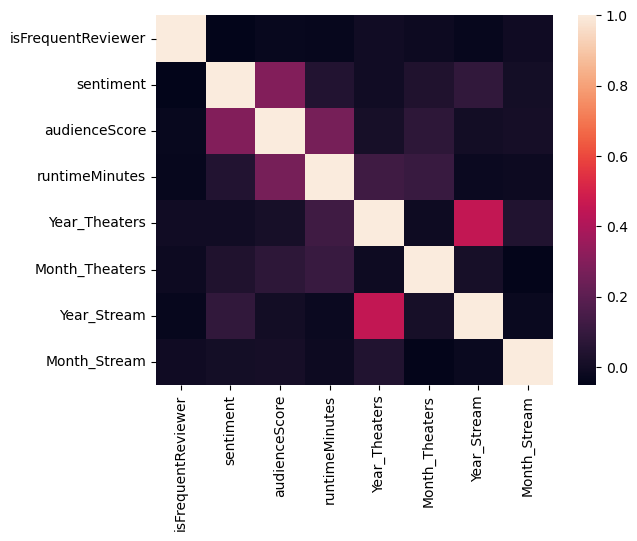

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
corr_matrix

,isFrequentReviewer,sentiment,audienceScore,runtimeMinutes,Year_Theaters,Month_Theaters,Year_Stream,Month_Stream
isFrequentReviewer,1.000000,-0.050806,-0.026313,-0.031757,-0.003171,-0.013973,-0.033056,-0.006511
sentiment,-0.050806,1.000000,0.297779,0.047179,-0.002842,0.036732,0.088521,0.003483
audienceScore,-0.026313,0.297779,1.000000,0.265502,0.014202,0.073057,0.000819,0.008624
runtimeMinutes,-0.031757,0.047179,0.265502,1.000000,0.122649,0.107822,-0.018545,-0.015272
Year_Theaters,-0.003171,-0.002842,0.014202,0.122649,1.000000,-0.010699,0.452856,0.041239
Month_Theaters,-0.013973,0.036732,0.073057,0.107822,-0.010699,1.000000,0.011079,-0.043407
Year_Stream,-0.033056,0.088521,0.000819,-0.018545,0.452856,0.011079,1.000000,-0.023136
Month_Stream,-0.006511,0.003483,0.008624,-0.015272,0.041239,-0.043407,-0.023136,1.000000


*Some interesting insights from the above correlation analysis are:      
1.The heighest correlation that sentiment has is with audienceScore. We see that the correlation value between the two variables is ~0.3. This indicates a positive correlation between the two, which is similar to expectation.     
2.We see also that being a reviwer has a negitive correlation with the sentiment.Though the correlation value of ~-0.05 is very small and its hard to get to any conclusion with that.*

# ***Preparing final data for model-building***

*Below we see allocate x and y for building the model. We use reviewText and reviewerName column as our x, since using merged dataset is not giving good results results for test_data, even though it is increasing the performance of train--train and validation dataset.This could be because even though it gives important information for the train data but that information might not be correct for test data.Moreover , we do not use the column 'isFrequentReviewer since there is no equivalent of that in tests data.*

In [ ]:
train_data.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [ ]:
x=train_data[['reviewText', 'reviewerName']]
y=train_data['sentiment']

In [ ]:
x.shape, y.shape

((162758, 2), (162758,))

In [ ]:
x.isnull().sum()

reviewText      0
reviewerName    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.13, random_state=42)

In [ ]:
x_train.shape, y_train.shape

((141599, 2), (141599,))

In [ ]:
x_test.shape, y_test.shape

((21159, 2), (21159,))

*We use countVectorizer for vectorizing the text data to make it usable for ML models. We have further optimized it's parameter to enhance the model performance. We also tried using TfidifVectorizer, but that did not have a good effect on performance.*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect1=CountVectorizer(min_df=1,ngram_range=(1,3))
vect2=CountVectorizer(min_df=1,ngram_range=(1,3))

In [ ]:
from sklearn.compose import make_column_transformer
ct2=make_column_transformer((vect1,'reviewText'),
                           ( vect2,'reviewerName'),
    remainder='passthrough')
ct2

ColumnTransformer(remainder='passthrough',
                  transformers=[('countvectorizer-1',
                                 CountVectorizer(ngram_range=(1, 3)),
                                 'reviewText'),
                                ('countvectorizer-2',
                                 CountVectorizer(ngram_range=(1, 3)),
                                 'reviewerName')])

In [ ]:
x_train_t=ct2.fit_transform(x_train)
x_test_t=ct2.transform(x_test)

In [ ]:
x_train_t.shape,x_test_t.shape

((141599, 2945522), (21159, 2945522))

# *Model-1--Linear.svm.SVC*

In [ ]:
from sklearn.svm import LinearSVC
lsvc= LinearSVC(C=0.02 , max_iter=1500)

In [ ]:
lsvc.fit(x_train_t,y_train)

LinearSVC(C=0.02, max_iter=1500)

In [ ]:
lsvc.score(x_train_t,y_train), lsvc.score(x_test_t,y_test)

(0.9807625760068927, 0.8213526159081243)

In [ ]:
y_pred_lsvc=lsvc.predict(x_test_t)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lsvc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      6992
           1       0.84      0.91      0.87     14167

    accuracy                           0.82     21159
   macro avg       0.81      0.78      0.79     21159
weighted avg       0.82      0.82      0.82     21159



***Insights***         
*We see all--precision,recall, f1_score and accuracy-- are better for 1(positive) than for 0(negitive).This could be because the dataset is imbalanced in favour of positive sentiment as we have seen above. Moreover, we see that there is almost a 0.15 difference in score for train and test data. This could be because despite the use ands optimization of regularization parameter, the model is overfitting on train_data.*       
*Apart from this we also tried both penalties and found 'l2' to be better suited. Also the default loss function gives a better result.*

***Hyperparameter tuning for LinearSvm*****

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.01,0.1, 1],'tol':[0.005, 0.001, 0.0001]
            }

In [ ]:
gscv_svm= GridSearchCV(estimator=LinearSVC(max_iter=3500), param_grid=param_grid,cv=3,
                     return_train_score=True, scoring='f1', n_jobs=-1)

In [ ]:
gscv_svm.fit(x_train_t,y_train)

GridSearchCV(cv=3, estimator=LinearSVC(max_iter=3500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'tol': [0.005, 0.001, 0.0001]},
             return_train_score=True, scoring='f1')

In [ ]:
results_svm=pd.DataFrame(gscv_svm.cv_results_)
results_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.952354,0.175852,0.072624,0.001399,0.01,0.005,"{'C': 0.01, 'tol': 0.005}",0.865750,0.868483,0.867310,0.867181,0.001119,1,0.976734,0.977115,0.976794,0.976881,0.000167
1,3.484214,0.316008,0.068472,0.002368,0.01,0.001,"{'C': 0.01, 'tol': 0.001}",0.865750,0.868483,0.867310,0.867181,0.001119,1,0.976734,0.977115,0.976794,0.976881,0.000167
2,4.190689,0.246930,0.069890,0.005249,0.01,0.0001,"{'C': 0.01, 'tol': 0.0001}",0.865750,0.868483,0.867310,0.867181,0.001119,1,0.976734,0.977115,0.976794,0.976881,0.000167
3,9.100217,0.210589,0.066593,0.000638,0.1,0.005,"{'C': 0.1, 'tol': 0.005}",0.864205,0.868124,0.867485,0.866605,0.001717,4,0.989824,0.990572,0.989927,0.990108,0.000331
4,14.270472,0.187761,0.066563,0.000993,0.1,0.001,"{'C': 0.1, 'tol': 0.001}",0.864205,0.868124,0.867485,0.866605,0.001717,4,0.989824,0.990572,0.989927,0.990108,0.000331
5,19.462941,0.818094,0.067768,0.000938,0.1,0.0001,"{'C': 0.1, 'tol': 0.0001}",0.864205,0.868124,0.867485,0.866605,0.001717,4,0.989824,0.990572,0.989927,0.990108,0.000331
6,31.504329,1.810135,0.093919,0.035666,1,0.005,"{'C': 1, 'tol': 0.005}",0.856983,0.860272,0.859617,0.858958,0.001421,9,0.990412,0.990941,0.990430,0.990595,0.000245
7,66.315684,7.901467,0.068031,0.000191,1,0.001,"{'C': 1, 'tol': 0.001}",0.856983,0.860272,0.859630,0.858962,0.001423,7,0.990412,0.990941,0.990430,0.990595,0.000245
8,95.038420,8.192742,0.045054,0.001175,1,0.0001,"{'C': 1, 'tol': 0.0001}",0.856983,0.860272,0.859630,0.858962,0.001423,7,0.990412,0.990941,0.990430,0.990595,0.000245


In [ ]:
gscv_svm.best_params_

{'C': 0.01, 'tol': 0.005}

In [ ]:
gscv_svm.score(x_train_t, y_train),gscv_svm.score(x_test_t, y_test)

(0.9755651975336835, 0.8721612827479789)

In [ ]:
y_pred_lsvm=gscv_svm.predict(x_test_t)

In [ ]:
print(classification_report(y_test,y_pred_lsvm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70      6992
           1       0.83      0.92      0.87     14167

    accuracy                           0.82     21159
   macro avg       0.81      0.77      0.78     21159
weighted avg       0.82      0.82      0.81     21159



In [ ]:
x1= results_svm['param_C']
y= results_svm['mean_test_score']
y2= results_svm['mean_train_score']
x2=results_svm['param_tol']

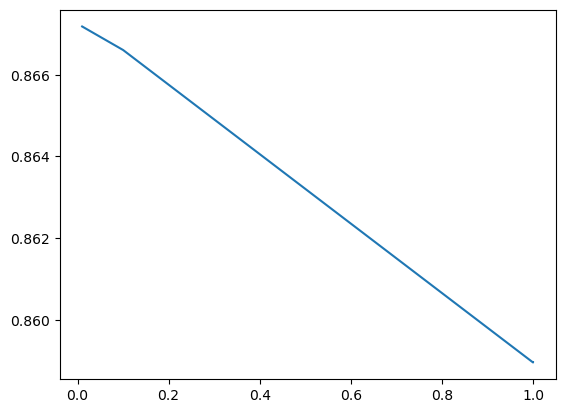

In [ ]:
plt.plot(x1,y)

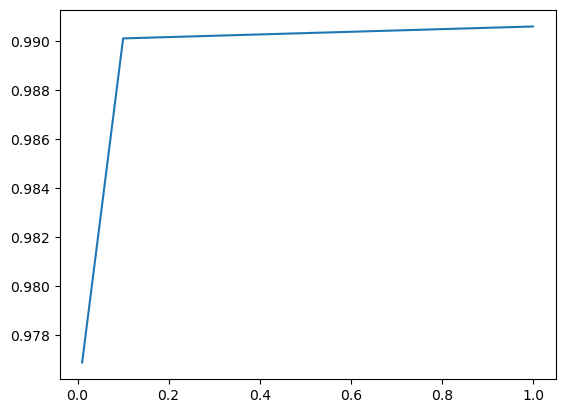

In [ ]:
plt.plot(x1,y2)

***Insights***

*We se that increasing the value of C meaning decreasing value of mean_train_score.This could be because increasing C means decreasing of regularization leading to overfitting of train data, as we  can see increasing the value of C increases the train score upto a certain C after which the score saturates having the heighest value.          
For our model we have chosen the value of regularization that is giving the best result for the validation set.         
Tolerance doesnt seem to have much effect on rank of the model which is mainly determined by the value of C. We get the heighest value of tolerance as the best parameter. This also can be because it leads to least overfitting of the training data. For our model we see that the default value of tolerance gives the best score.*

# *Model-2--Logistic Regresssion*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000,C=0.35)

In [ ]:
lr.fit(x_train_t,y_train)

LogisticRegression(C=0.35, max_iter=1000)

In [ ]:
lr.score(x_train_t, y_train), lr.score(x_test_t, y_test)

(0.9839405645520095, 0.8227704522898057)

In [ ]:
y_pred_lr=lr.predict(x_test_t)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.64      0.71      6992
           1       0.84      0.91      0.87     14167

    accuracy                           0.82     21159
   macro avg       0.81      0.78      0.79     21159
weighted avg       0.82      0.82      0.82     21159



***Hyperparameter tuning of LogisticRegression.***

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'solver':['lbfgs','liblinear','sag','newton-cg'],'C':[0.01,0.1,1]}

In [ ]:
gscv_lr= GridSearchCV(estimator=LogisticRegression(max_iter=3500),return_train_score=True,
                      scoring='f1', param_grid=param_grid,cv=3, n_jobs=-1)

In [ ]:
gscv_lr.fit(x_train_t,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=3500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'newton-cg']},
             return_train_score=True, scoring='f1')

In [ ]:
results_lr=pd.DataFrame(gscv_lr.cv_results_)
results_lr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,73.502000,1.455523,0.076254,0.014331,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.844538,0.845369,0.844945,0.844951,0.000339,11,0.879670,0.879899,0.879860,0.879809,0.000100
1,19.606079,0.484151,0.086426,0.006731,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.844832,0.845611,0.845249,0.845231,0.000318,9,0.880062,0.880177,0.880243,0.880161,0.000075
2,16.128505,1.807072,0.078616,0.013183,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.844578,0.845365,0.844989,0.844977,0.000321,10,0.879695,0.879916,0.879896,0.879836,0.000100
3,64.311959,1.794990,0.077983,0.002421,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.844526,0.845369,0.844957,0.844951,0.000344,12,0.879662,0.879913,0.879866,0.879814,0.000109
4,172.404704,4.913921,0.069942,0.001504,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.864925,0.866468,0.866172,0.865855,0.000669,8,0.973440,0.973834,0.973692,0.973655,0.000163
5,37.894807,3.816346,0.077832,0.005719,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.865049,0.866504,0.866194,0.865915,0.000625,6,0.973494,0.973849,0.973760,0.973701,0.000151
6,49.814538,3.272330,0.076500,0.005194,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.865062,0.866495,0.866202,0.865920,0.000618,5,0.973493,0.973849,0.973745,0.973696,0.000149
7,101.758355,4.546097,0.083573,0.006494,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.864925,0.866498,0.866151,0.865858,0.000675,7,0.973448,0.973834,0.973707,0.973663,0.000161
8,316.864108,8.276075,0.068149,0.001781,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.865944,0.869458,0.868897,0.868100,0.001541,2,0.989907,0.990582,0.989930,0.990140,0.000313
9,67.220585,2.225519,0.079610,0.004132,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.865931,0.869462,0.868880,0.868091,0.001546,3,0.989907,0.990582,0.989930,0.990140,0.000313


In [ ]:
gscv_lr.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [ ]:
gscv_lr.score(x_train_t, y_train),gscv_lr.score(x_test_t, y_test)

(0.989801164681811, 0.8727136737607942)

In [ ]:
y_pred_lr=gscv_lr.predict(x_test_t)

In [ ]:
print(classification_report(y_test,y_pred_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      6992
           1       0.84      0.91      0.87     14167

    accuracy                           0.82     21159
   macro avg       0.81      0.78      0.79     21159
weighted avg       0.82      0.82      0.82     21159



In [ ]:
x_lr= results_lr['param_C']
y_lr= results_lr['mean_test_score']
y2_lr= results_lr['mean_train_score']


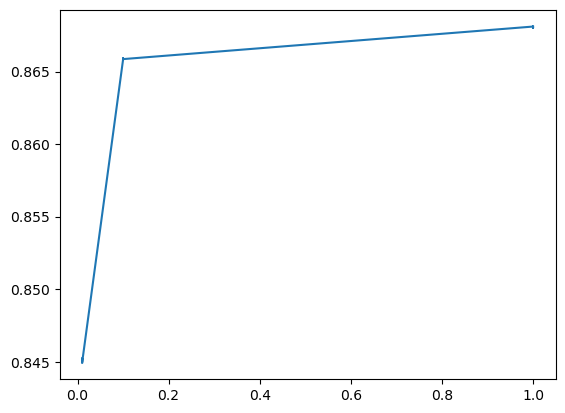

In [ ]:
plt.plot(x_lr,y_lr)

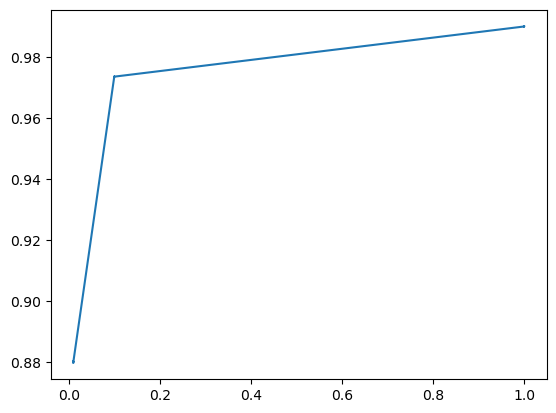

In [ ]:
plt.plot(x_lr,y2_lr)

***Insights***

*For 'C' we observed here is that for both validation and train score the trend of increase in the value of C, which means that decreasing regularization is leading to an increase in both the train and validation efficiency.This is not the case for our test and train data, this could be because since it is the same dataset overfitting might be resulting better score. The best parameters that were obtained were: solver:'newton-cg' and 'C':1.
However, we saw that the solver hardly made any difference for the score and C was main the reason for its change.
For the score on our validation set we see that the final parameters yield the best score and the lowest difference between train and validation score.Moreover, the default solver gives the same result as newton-cg*

# *Model-3--Perceptron*

In [ ]:
from sklearn.linear_model import Perceptron
perc=Perceptron(eta0=0.01)

In [ ]:
perc.fit(x_train_t,y_train)

Perceptron(eta0=0.01)

In [ ]:
perc.score(x_train_t,y_train), perc.score(x_test_t,y_test)

(0.9764475737823007, 0.8048111914551728)

In [ ]:
y_pred_perc=perc.predict(x_test_t)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_perc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      6992
           1       0.84      0.88      0.86     14167

    accuracy                           0.80     21159
   macro avg       0.78      0.77      0.77     21159
weighted avg       0.80      0.80      0.80     21159



*We see that the f1-score for both 0 and 1 is  for this model is lower than the earlier  two. Moreso, for 1 than for 0. It could be because of that we get a lower test score.*

***Hyperparameter tuning of Perceptron.***

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'eta0':[0.01,0.05,1,10], 'penalty':['l1','l2',None]}


In [ ]:
gscv_perc= GridSearchCV(estimator=perc,param_grid=param_grid,cv=3,n_jobs=-1)

In [ ]:
gscv_perc.fit(x_train_t,y_train)

GridSearchCV(cv=3, estimator=Perceptron(eta0=0.01), n_jobs=-1,
             param_grid={'eta0': [0.01, 0.05, 1, 10],
                         'penalty': ['l1', 'l2', None]})

In [ ]:
results_perc=pd.DataFrame(gscv_perc.cv_results_)
results_perc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.070093,0.193070,0.046881,0.001998,0.01,l1,"{'eta0': 0.01, 'penalty': 'l1'}",0.705191,0.690487,0.711223,0.702300,0.008708,8
1,1.214295,0.030122,0.047718,0.001937,0.01,l2,"{'eta0': 0.01, 'penalty': 'l2'}",0.792585,0.779364,0.783978,0.785309,0.005479,5
2,1.292693,0.071896,0.049656,0.004776,0.01,None,"{'eta0': 0.01, 'penalty': None}",0.799534,0.801483,0.796585,0.799201,0.002014,4
3,2.971315,0.369301,0.046823,0.003947,0.05,l1,"{'eta0': 0.05, 'penalty': 'l1'}",0.709110,0.668814,0.711731,0.696552,0.019643,9
4,1.165130,0.080810,0.048493,0.003036,0.05,l2,"{'eta0': 0.05, 'penalty': 'l2'}",0.766758,0.754809,0.722960,0.748176,0.018486,6
5,1.545158,0.099581,0.052494,0.003703,0.05,None,"{'eta0': 0.05, 'penalty': None}",0.801822,0.806038,0.805526,0.804462,0.001878,1
6,5.373315,0.722320,0.048506,0.002827,1,l1,"{'eta0': 1, 'penalty': 'l1'}",0.645127,0.716801,0.682112,0.681347,0.029266,11
7,1.453986,0.256480,0.042748,0.000235,1,l2,"{'eta0': 1, 'penalty': 'l2'}",0.694153,0.678284,0.686455,0.686297,0.006479,10
8,2.236068,0.276902,0.046361,0.002308,1,None,"{'eta0': 1, 'penalty': None}",0.792013,0.805360,0.802411,0.799928,0.005725,3
9,3.977634,0.813568,0.047249,0.002485,10,l1,"{'eta0': 10, 'penalty': 'l1'}",0.709534,0.721843,0.710841,0.714073,0.005520,7


In [ ]:
gscv_perc.best_params_ ,gscv_perc.best_score_

({'eta0': 0.05, 'penalty': None}, 0.8044619034289604)

In [ ]:
x1=results_perc['param_eta0']
y= results_perc['mean_test_score']
#y2= results_perc['mean_train_score']

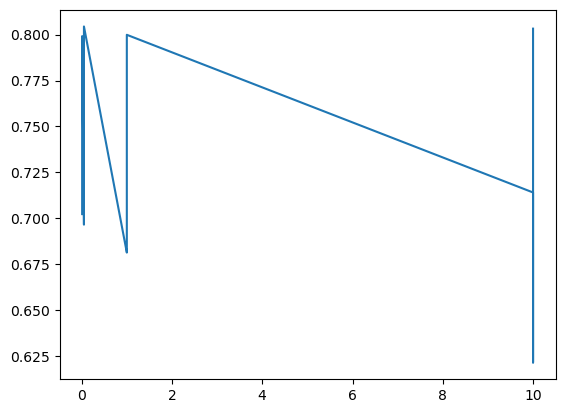

In [ ]:
plt.plot(x1,y)

*From the hyperparameter tuning above we  make the following observations:     
1.Learning parameter eta0 does not not follow any particular trend with efficiency. Here we get 0.05 as the best eta0, but for the validation set we have we get the best results using 0.01 as eta0, which is expected since there is no specific trend of eta0 and efficiency.*       
*2. We see also the efficiency for different penalties follow the following order: None>l2>l1. The best parameter for this is 'None' which is also the default parameter. It is the same parameter we have used in our final model.*

# *Balancing Datasets*

*We have seen above that the train_dataset is imbalanced due to higher positive reviews than negitive reviews.We balance this datset and see if it improves effciency.We do this using two balancing methods--oversampling and undersampling*
***1.SMOTE--oversampling             
2.NearMiss--undersampling***

In [ ]:
y_train.value_counts()#imbalanced

1    94594
0    47005
Name: sentiment, dtype: int64

***2.NearMiss--undersampling***

In [ ]:
from imblearn.under_sampling import NearMiss
nm=NearMiss( )

In [ ]:
x_bal,y_bal=nm.fit_resample(x_train_t,y_train)

In [ ]:
y_bal.value_counts()

0    47005
1    47005
Name: sentiment, dtype: int64

In [ ]:
#fitting linearsvm
lsvc.fit(x_bal,y_bal)
lr.fit(x_bal, y_bal)
perc.fit(x_bal,y_bal)

Perceptron(eta0=0.01)

In [ ]:
print(lsvc.score(x_train_t,y_train), lsvc.score(x_test_t,y_test))
print(lr.score(x_train_t,y_train), lr.score(x_test_t,y_test))
print(perc.score(x_train_t,y_train), perc.score(x_test_t,y_test))

0.8339112564354269 0.7391181057705941
0.8340030649933968 0.7363296942199536
0.8379790817731764 0.7304693038423365


In [ ]:
y_pred_lsvc=lsvc.predict(x_test_t)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lsvc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67      6992
           1       0.87      0.72      0.79     14167

    accuracy                           0.74     21159
   macro avg       0.72      0.75      0.73     21159
weighted avg       0.77      0.74      0.75     21159



In [ ]:
y_pred_lr=lr.predict(x_test_t)
print(classification_report(y_test,y_pred_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67      6992
           1       0.88      0.71      0.78     14167

    accuracy                           0.74     21159
   macro avg       0.72      0.75      0.72     21159
weighted avg       0.78      0.74      0.74     21159



In [ ]:
y_pred_perc=perc.predict(x_test_t)
print(classification_report(y_test,y_pred_perc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67      6992
           1       0.89      0.68      0.77     14167

    accuracy                           0.73     21159
   macro avg       0.73      0.76      0.72     21159
weighted avg       0.78      0.73      0.74     21159



*Above, we have used undersampling to balance our imbalanced dataset. This means that we have reduced the number of majority samples to bring a balance in the dataset. We see that all the models give a worse result with this kind of method. This is because.*      

*1. As we can see from the classification report that even with this method, there has been no increase in the f1 score for predicting 0 but there has been a decrease in the f1 score for predicting 1.*          
*2. Undersampling the positive sentiment data might have deleted some important information relevant for better performance*

***1.SMOTE--oversampling***

In [ ]:
y_train.value_counts()

1    94594
0    47005
Name: sentiment, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()

In [ ]:
x_bal1,y_bal1= SM.fit_resample(x_train_t, y_train)

In [ ]:
y_bal1.value_counts()

1    94594
0    94594
Name: sentiment, dtype: int64

In [ ]:
lsvc.fit(x_bal1,y_bal1)
lr.fit(x_bal1, y_bal1)
perc.fit(x_bal1,y_bal1)

Perceptron(eta0=0.01)

In [ ]:
print(lsvc.score(x_train_t,y_train), lsvc.score(x_test_t,y_test))
print(lr.score(x_train_t,y_train), lr.score(x_test_t,y_test))
print(perc.score(x_train_t,y_train), perc.score(x_test_t,y_test))

0.9721678825415434 0.796209650739638
0.9772597264104973 0.7971076137813696
0.9713698543068807 0.793184933125384


In [ ]:
y_pred_lsvc=lsvc.predict(x_test_t)
print(classification_report(y_test,y_pred_lsvc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      6992
           1       0.86      0.83      0.85     14167

    accuracy                           0.80     21159
   macro avg       0.77      0.78      0.77     21159
weighted avg       0.80      0.80      0.80     21159



In [ ]:
y_pred_lr=lr.predict(x_test_t)
print(classification_report(y_test,y_pred_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      6992
           1       0.85      0.84      0.85     14167

    accuracy                           0.80     21159
   macro avg       0.77      0.77      0.77     21159
weighted avg       0.80      0.80      0.80     21159



In [ ]:
y_pred_perc=perc.predict(x_test_t)
print(classification_report(y_test,y_pred_perc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      6992
           1       0.85      0.84      0.84     14167

    accuracy                           0.79     21159
   macro avg       0.77      0.77      0.77     21159
weighted avg       0.79      0.79      0.79     21159



*Here, we see there is not much difference in the f1_score in predicting the 0, but the f1_score for predicting 1 has decreased. This can be because the score is calculated on the test data and not the train data.       
It seems that the test data itself is positively biased leading to better results using a biased dataset.*

# *Model 4-Ensemble-VotingClassifier*

***The three models presented above are the best performing models. Apart from these I have tried KNN, DesicionTree, SDGRegressor, MultinomialNB and DummyClassifer. Also, I have used ensemble methods --RandomForest, BaggingClassifier( for all the above three models).None of these trials gave better results for test_datasets.       
Tree related models gave almost a 100 percent accuracy for train_data but the result for test data was much lower. Even after hyperparameter tuning and reducing overfitting with parameters like max_depth, min_leaf_size, etc, the efficiency for test data did not increase beyond 0.8.
For other models they were the accuracy of the model was not that good for both train and test datasets.
For bagging, even though the accuracy went above 0.8, the accuracy for single models was better.***

***Therefore we have chosen VotingClassifier and for that we have chosen to use three best performing models as estimators for voting.Using this we got the best score for the model.***

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
VC = VotingClassifier(estimators = [('est1', lr), ('est2', lsvc), ('est3', perc)])


In [ ]:
lsvc.fit(x_train_t,y_train)
lr.fit(x_train_t,y_train)
perc.fit(x_train_t,y_train)


Perceptron(eta0=0.01)

In [ ]:
VC.fit(x_train_t, y_train)

VotingClassifier(estimators=[('est1',
                              LogisticRegression(C=0.35, max_iter=1000)),
                             ('est2', LinearSVC(C=0.02, max_iter=1500)),
                             ('est3', Perceptron(eta0=0.01))])

In [ ]:
VC.score(x_train_t,y_train), VC.score(x_test_t,y_test)

(0.9838346316005057, 0.8227704522898057)

In [ ]:
y_pred_VC=VC.predict(x_test_t)
print(classification_report(y_test,y_pred_VC, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.64      0.71      6992
           1       0.84      0.91      0.87     14167

    accuracy                           0.82     21159
   macro avg       0.81      0.78      0.79     21159
weighted avg       0.82      0.82      0.82     21159



*There is not much space for hyperparameter tuning in this model. Between voting='soft' or 'hard','hard' voting gives better result for both train and test. It is also the default parameter, so that has been kept the same.*

***Checking and preprocessing test data and doing the final predictions***

In [ ]:
test_data.shape, sample_data.shape

((55315, 4), (55315, 2))

In [ ]:
test_data.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [ ]:
test_data.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [ ]:
x_final=test_data[['reviewText','reviewerName']]

In [ ]:
x_final.isnull().sum()

reviewText      2510
reviewerName       0
dtype: int64

In [ ]:
x_final['reviewText']=si.transform(x_final[['reviewText']])

/tmp/ipykernel_20/1397152920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_final['reviewText']=si.transform(x_final[['reviewText']])


In [ ]:
x_final.shape

(55315, 2)

In [ ]:
x_final_t=ct2.transform(x_final)

In [ ]:
sentiment=VC.predict(x_final_t)
sentiment= le.inverse_transform(sentiment)
sentiment

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [ ]:
sample_data.head()

,id,sentiment
0,0,NEGATIVE
1,1,NEGATIVE
2,2,NEGATIVE
3,3,NEGATIVE
4,4,NEGATIVE


In [ ]:
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=np.arange(0,len(sentiment))
submission['sentiment']=sentiment

In [ ]:
#submission.to_csv('submission.csv',index=False)

# *COMPARISON*

In [ ]:
comp={'Model':['LinearSVC','LogisticRegression','Perceptron','VotingClassifier'],
      'F1_score_0':[0.70,0.71,0.69,0.71 ],
      'F1_score_1':[0.87, 0.87 ,0.86,0.87]}

In [ ]:
df= pd.DataFrame(comp)
df

,Model,F1_score_0,F1_score_1
0,LinearSVC,0.70,0.87
1,LogisticRegression,0.71,0.87
2,Perceptron,0.69,0.86
3,VotingClassifier,0.71,0.87


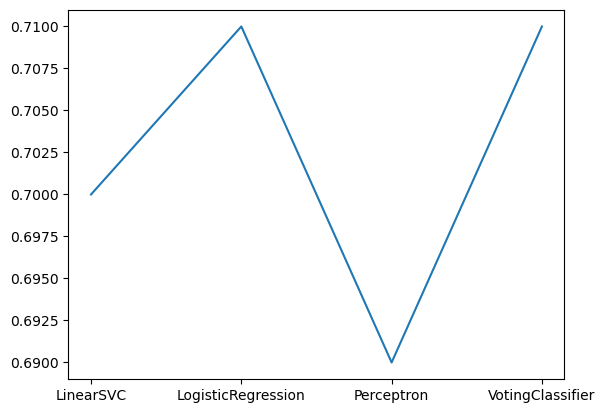

In [ ]:
plt.plot(df['Model'],df['F1_score_0'] )

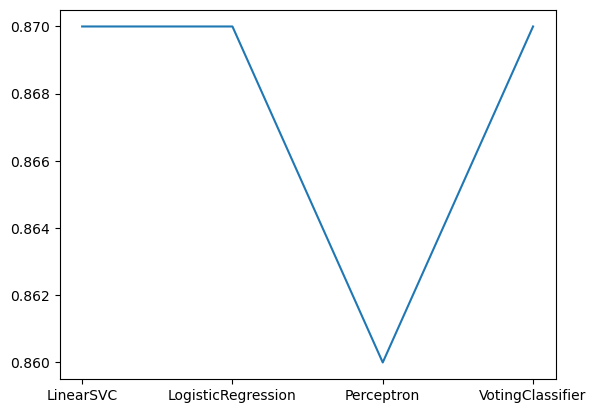

In [ ]:
plt.plot(df['Model'],df['F1_score_1'] )

*The Scores observed after submission have been of the order:*   

***VC> LogReg>LinSVC>Perceptron***


*The difference between accuracy is very close in the first three models. We see that's because the f1_score_1 for all the three is the same.*

*We see also, that f1_score_0 for VC and LogReg is only slightly higher leading to a slight increase in efficiency.*

*Perceptron gives the worst score out of all these models, because as seen above it has the lowest f1_score for predicting both the positive and the negitive sentiments.*
